# Analyse des données

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Chargement des données
training= pd.read_csv('C:/Users/DIARRA née CISSE Bal/Documents/python/training.csv',delimiter=';',names=["cancer code","sex","age","country","town","ethnic group","year","incidence"],low_memory=False)

In [3]:
#Visualisation des 5 premières lignes
training.head(5)

,cancer code,sex,age,country,town,ethnic group,year,incidence
0,C00-96 but C44,1,1,Australia,New South Wales,NaN,1983,47
1,C00-96 but C44,1,2,Australia,New South Wales,NaN,1983,19
2,C00-96 but C44,1,3,Australia,New South Wales,NaN,1983,29
3,C00-96 but C44,1,4,Australia,New South Wales,NaN,1983,47
4,C00-96 but C44,1,5,Australia,New South Wales,NaN,1983,97


In [4]:
#Nombre de lignes et de colonnes
training.shape

(16108276, 8)

In [5]:
#Description de training
training.describe(include='all')

,cancer code,sex,age,country,town,ethnic group,year,incidence
count,16108276,16108276.0,1.610828e+07,16108276,13824780,4071776,1.610828e+07,1.610828e+07
unique,169,NaN,NaN,28,75,10,NaN,NaN
top,X71-72.7,NaN,NaN,USA,California,Black,NaN,NaN
freq,622972,NaN,NaN,4670162,1581940,1279308,NaN,NaN
mean,NaN,1.5,1.000000e+01,NaN,NaN,NaN,1.989770e+03,3.210022e+00
std,NaN,0.5,5.477226e+00,NaN,NaN,NaN,8.749258e+00,5.636241e+01
min,NaN,1.0,1.000000e+00,NaN,NaN,NaN,1.958000e+03,0.000000e+00
25%,NaN,1.0,5.000000e+00,NaN,NaN,NaN,1.984000e+03,0.000000e+00
50%,NaN,1.5,1.000000e+01,NaN,NaN,NaN,1.991000e+03,0.000000e+00
75%,NaN,2.0,1.500000e+01,NaN,NaN,NaN,1.997000e+03,0.000000e+00


In [6]:
#training['ethnic group'].value_counts().plot.pie()
#pd.isna(training['ethnic group'])
#training.loc[,['ethnic group']]


In [7]:
#training['ethnic group'].value_counts()

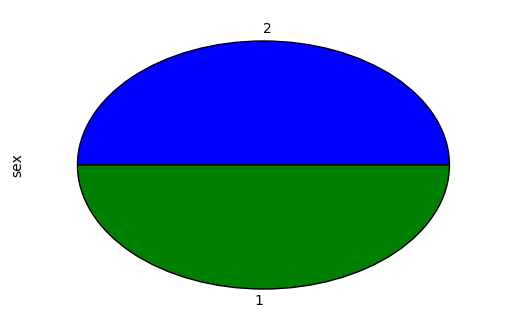

In [3]:
training['sex'].value_counts().plot.pie()

In [9]:
#training['year'].value_counts()
training.groupby(['year'])['incidence'].sum()

year
1958       5667
1959       5673
1960       5825
1961       6099
1962       6433
1963      34188
1964      35360
1965      36827
1966      37606
1967      38575
1968      66008
1969      65573
1970      71206
1971      72248
1972      75643
1973     277223
1974     311303
1975     706159
1976     722097
1977     737587
1978     855419
1979    1013800
1980    1054138
1981    1080324
1982    1104861
1983    1310690
1984    1347846
1985    1437254
1986    1458560
1987    1519498
1988    1651206
1989    1814752
1990    1867773
1991    1955321
1992    2020236
1993    2475146
1994    2538717
1995    2575626
1996    2611975
1997    2654051
1998    2723224
1999    2776684
2000    2808833
2001    2856494
2002    2878200
Name: incidence, dtype: int64

In [4]:
#training.hist(column='incidence',by='year')
#tweets_by_type = tweets.groupby(['source_new'])['followers_count'].sum()
training_by_cancer = training.groupby(['cancer code'])['incidence'].sum()

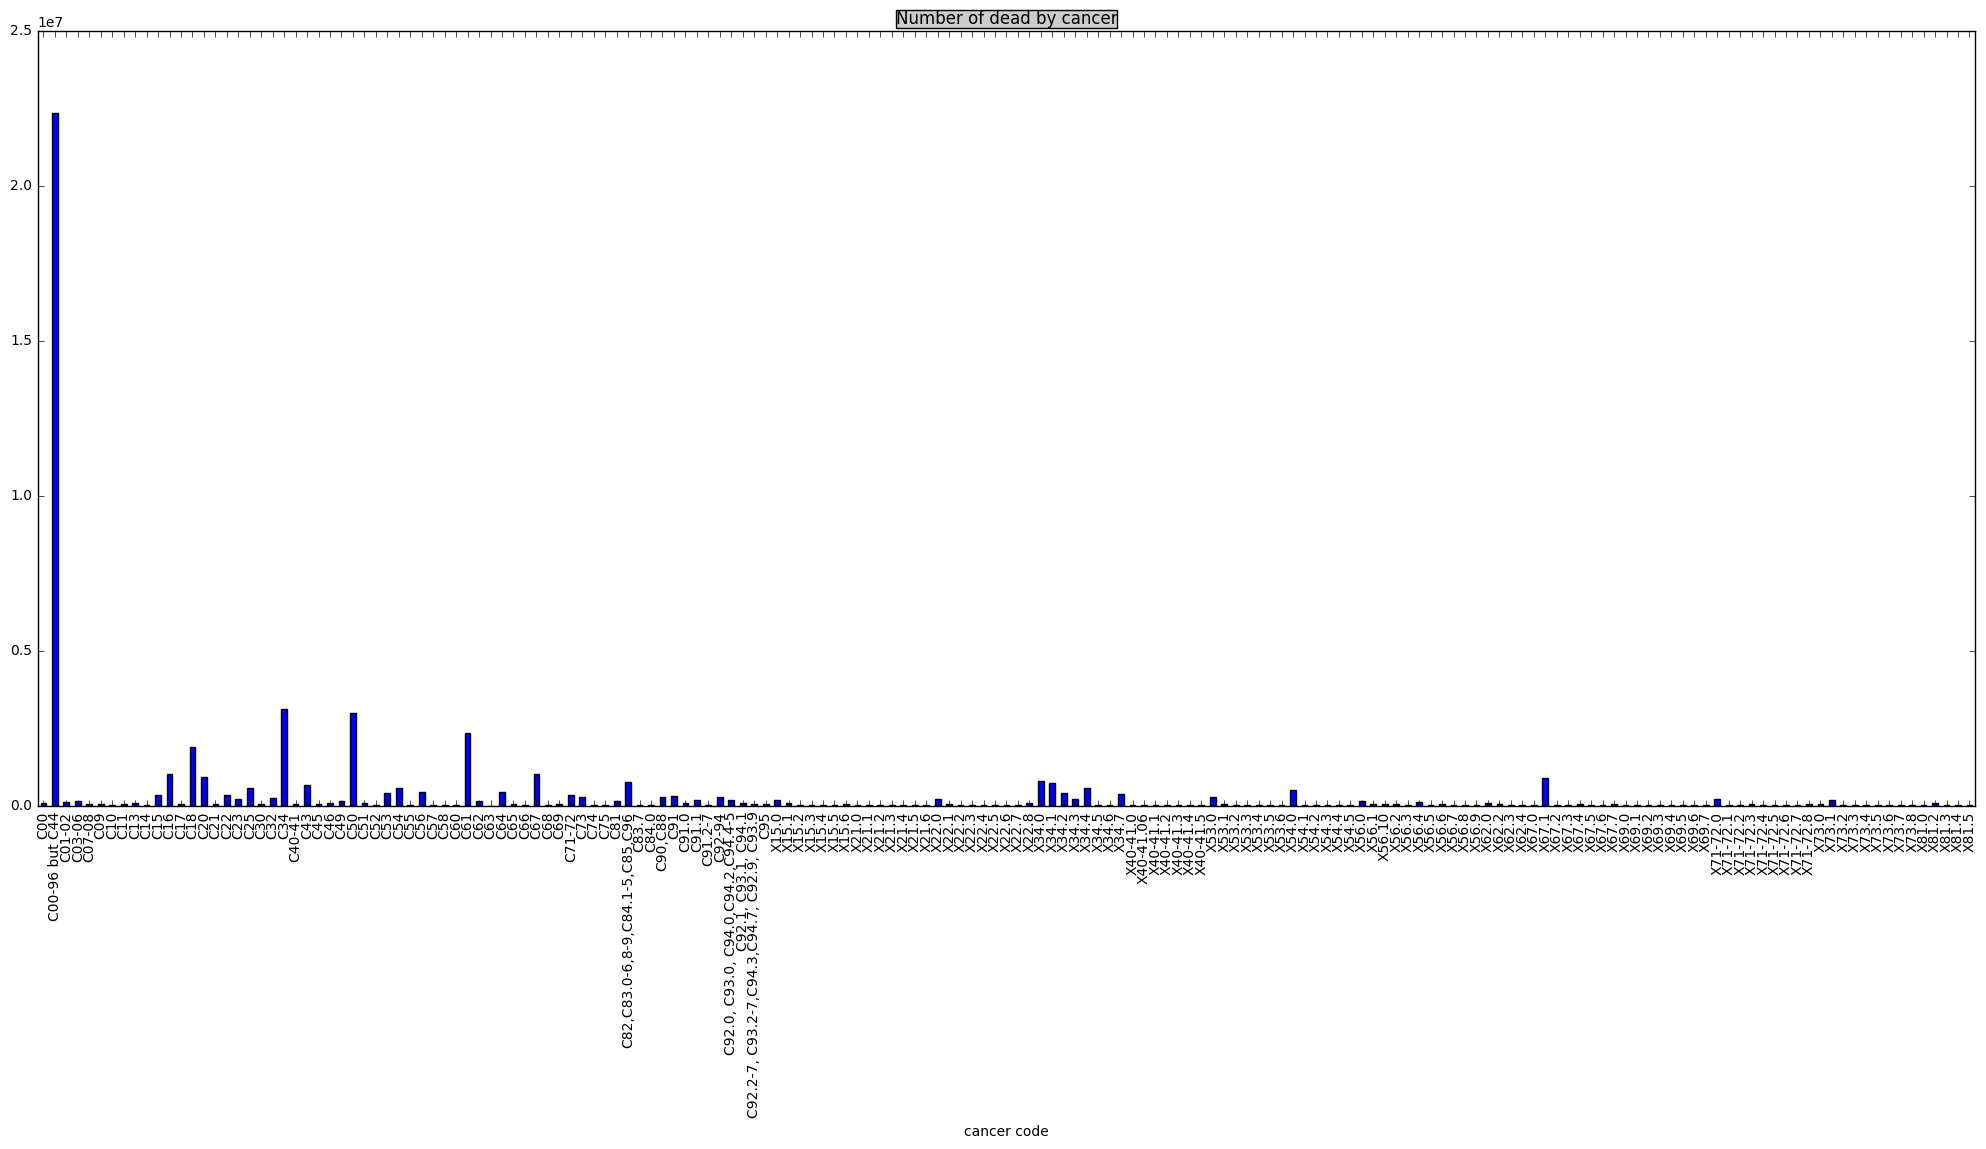

In [5]:
training_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of dead by cancer', bbox={'facecolor':'0.8', 'pad':0})

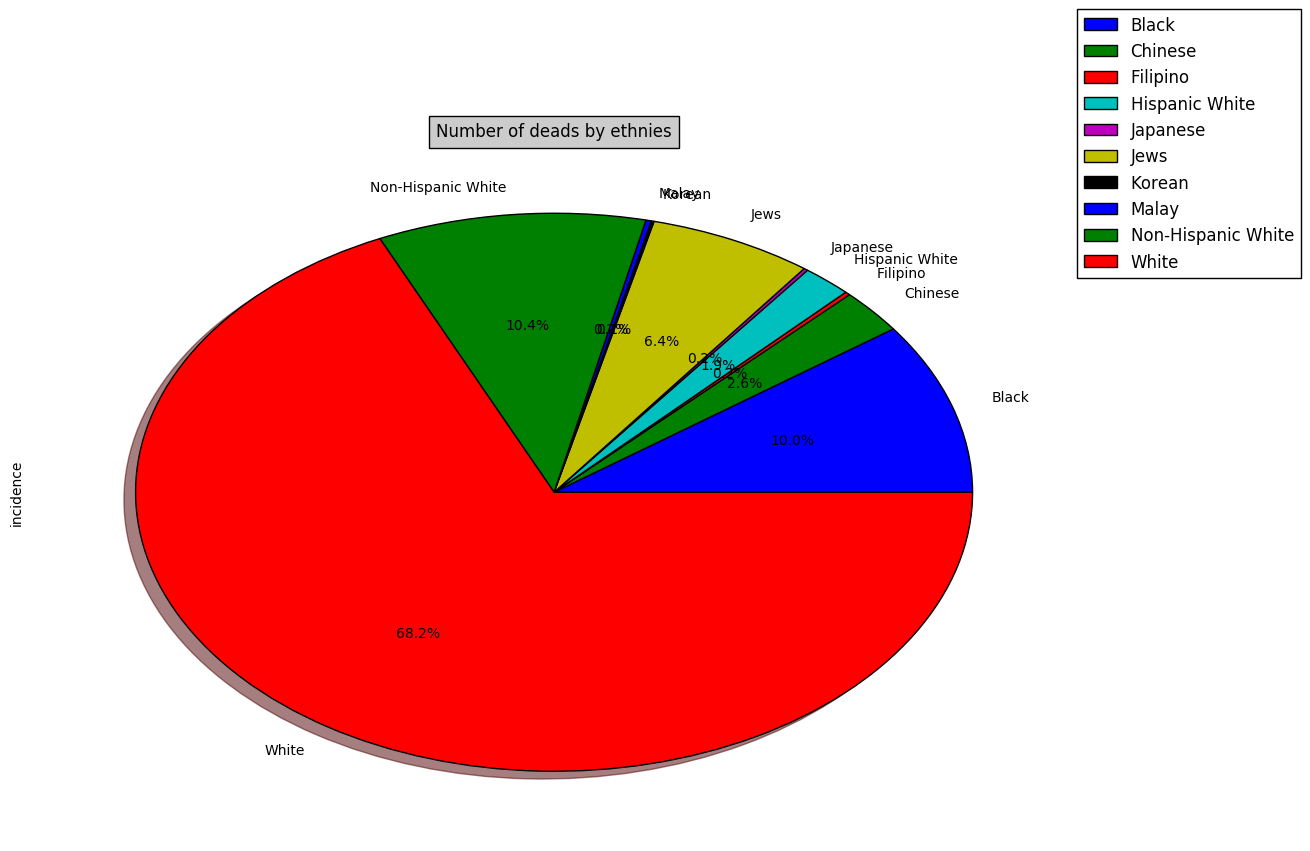

In [10]:
training_by_ethnie=training.groupby(['ethnie'])['incidence'].sum()
explode = (0, 0, 0, 0, 0,0,0,0,0,0)
training_by_ethnie.transpose().plot(kind='pie',figsize=(13.5, 9),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of deads by ethnies', bbox={'facecolor':'0.8', 'pad':5})
#training['ethnie'].value_counts().plot.pie()

In [4]:
incidence_2002=training[training['year'].isin([2002])]
type(incidence_2002)

pandas.core.frame.DataFrame

In [5]:
incidence_2002.head(5)

,cancer code,sex,age,country,town,ethnic group,year,incidence
130682,C00-96 but C44,1,1,Australia,New South Wales,NaN,2002,37
130683,C00-96 but C44,1,2,Australia,New South Wales,NaN,2002,39
130684,C00-96 but C44,1,3,Australia,New South Wales,NaN,2002,34
130685,C00-96 but C44,1,4,Australia,New South Wales,NaN,2002,51
130686,C00-96 but C44,1,5,Australia,New South Wales,NaN,2002,89


In [27]:
#Répartition des sexes, autant d'hommes que de femmes
incidence_2002['sex'].value_counts()
#.plot.pie()

2    361095
1    361095
Name: sex, dtype: int64

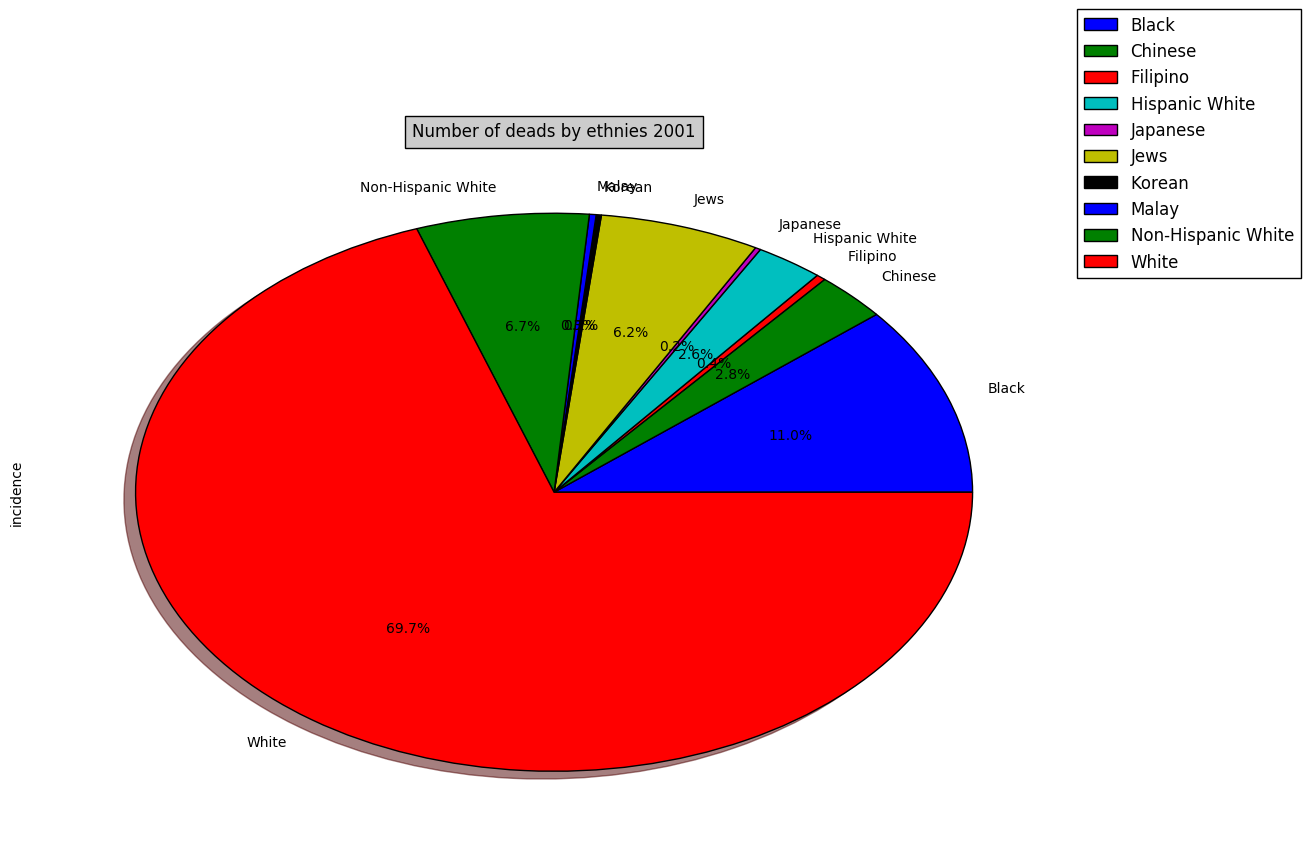

In [6]:
#l'incidence en 2002 des cancers sur les differents ethnies
incidence_2002_by_ethnie=incidence_2002.groupby(['ethnic group'])['incidence'].sum()
explode = (0, 0, 0, 0, 0,0,0,0,0,0)
incidence_2002_by_ethnie.transpose().plot(kind='pie',figsize=(13.5, 9),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of deads by ethnies 2002', bbox={'facecolor':'0.8', 'pad':5})
#.count()

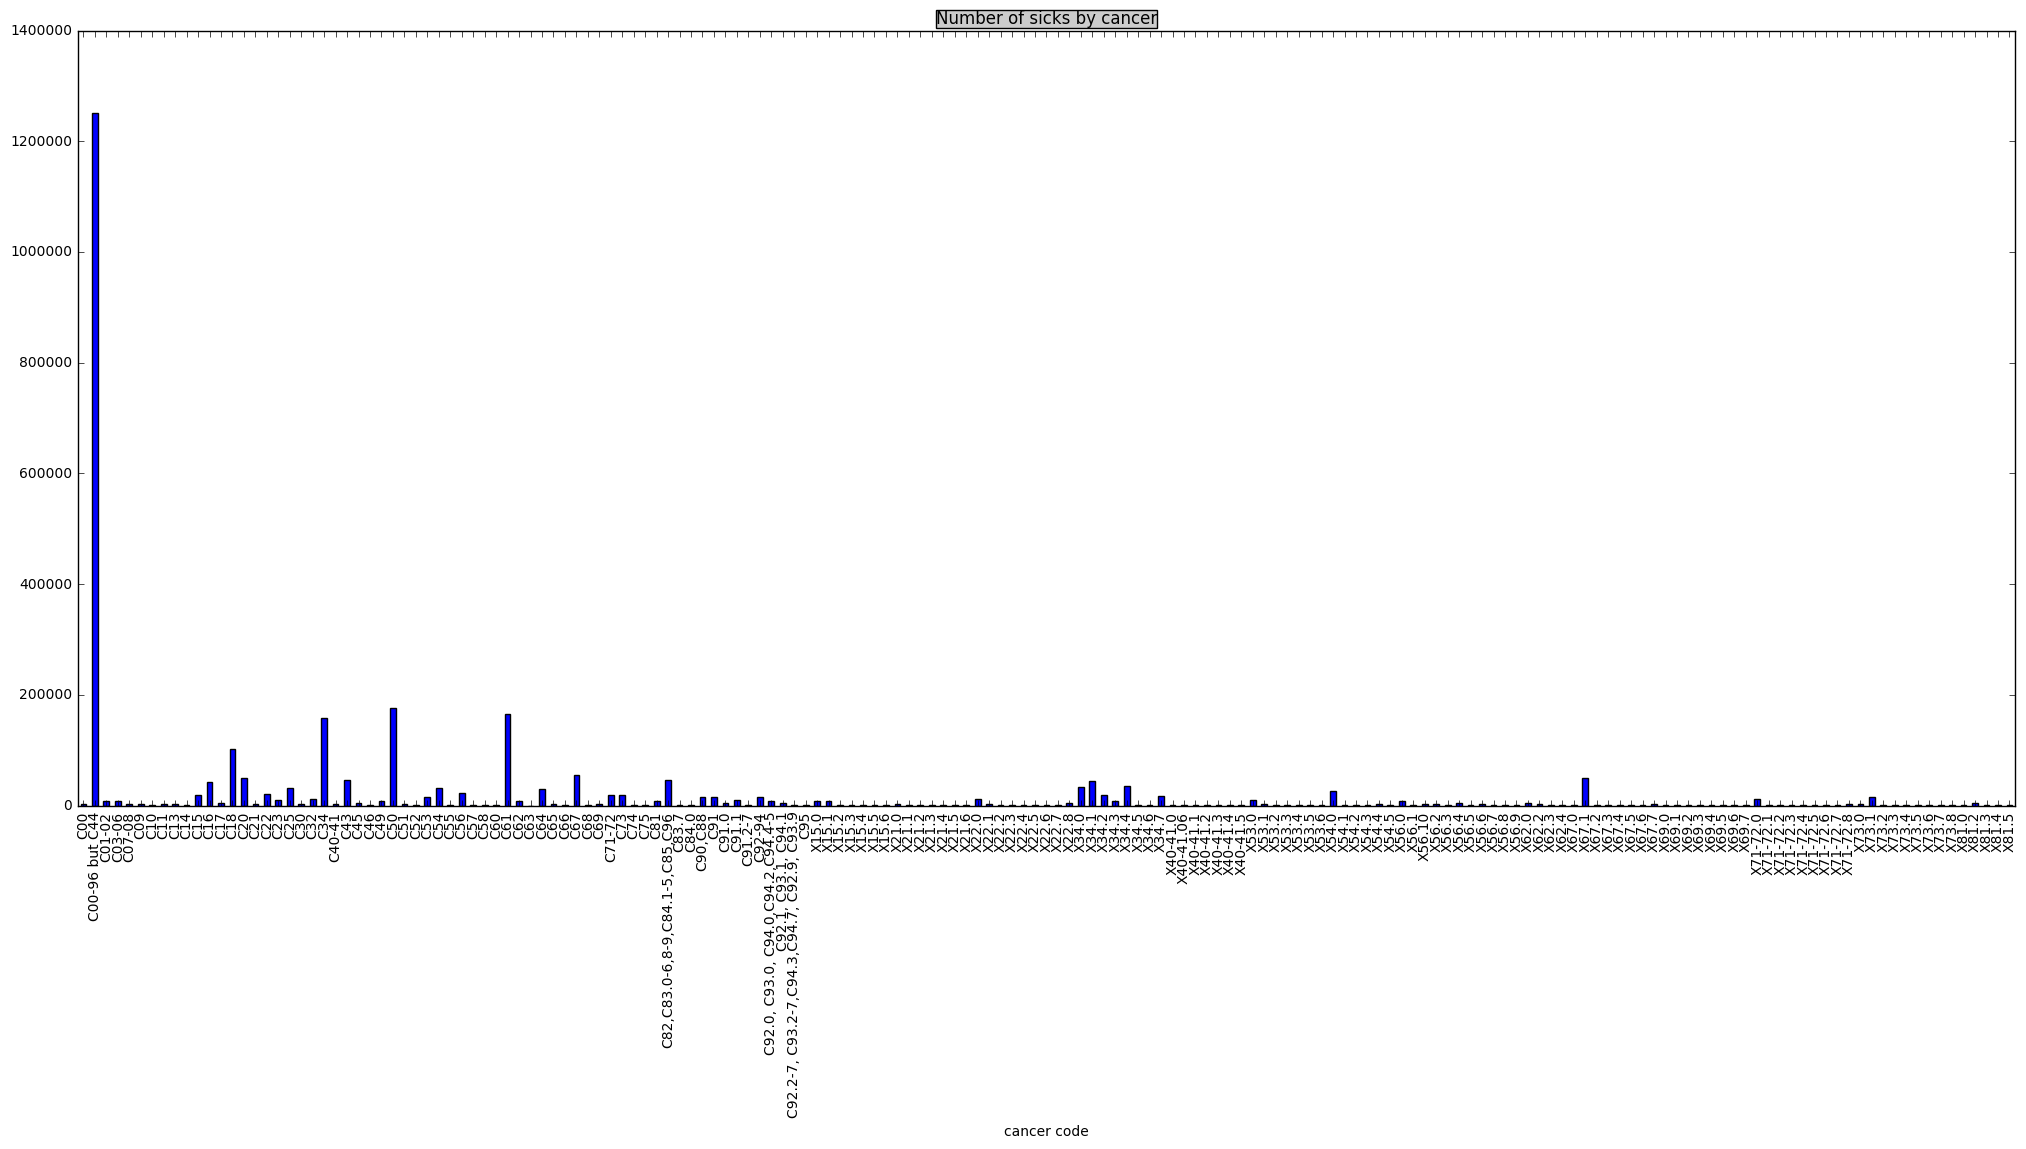

In [7]:
#On voudrait savoir quels sont les cancers qui ont le plus d'incidence
incidence_2002_by_cancer = incidence_2002.groupby(['cancer code'])['incidence'].sum()
incidence_2002_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of sicks by cancer', bbox={'facecolor':'0.8', 'pad':0})

In [21]:
#On voudrait savoir quel of dead by cancer', bbox={'facecolor':'0.8', 'pad':0})est le taux d'incidence par pays mais ce reultat est biaisé car il faudrait tenir compte de la demographie de chaque pays
incidence_2002_by_country = incidence_2002.groupby(['country'])['cancer code'].count()

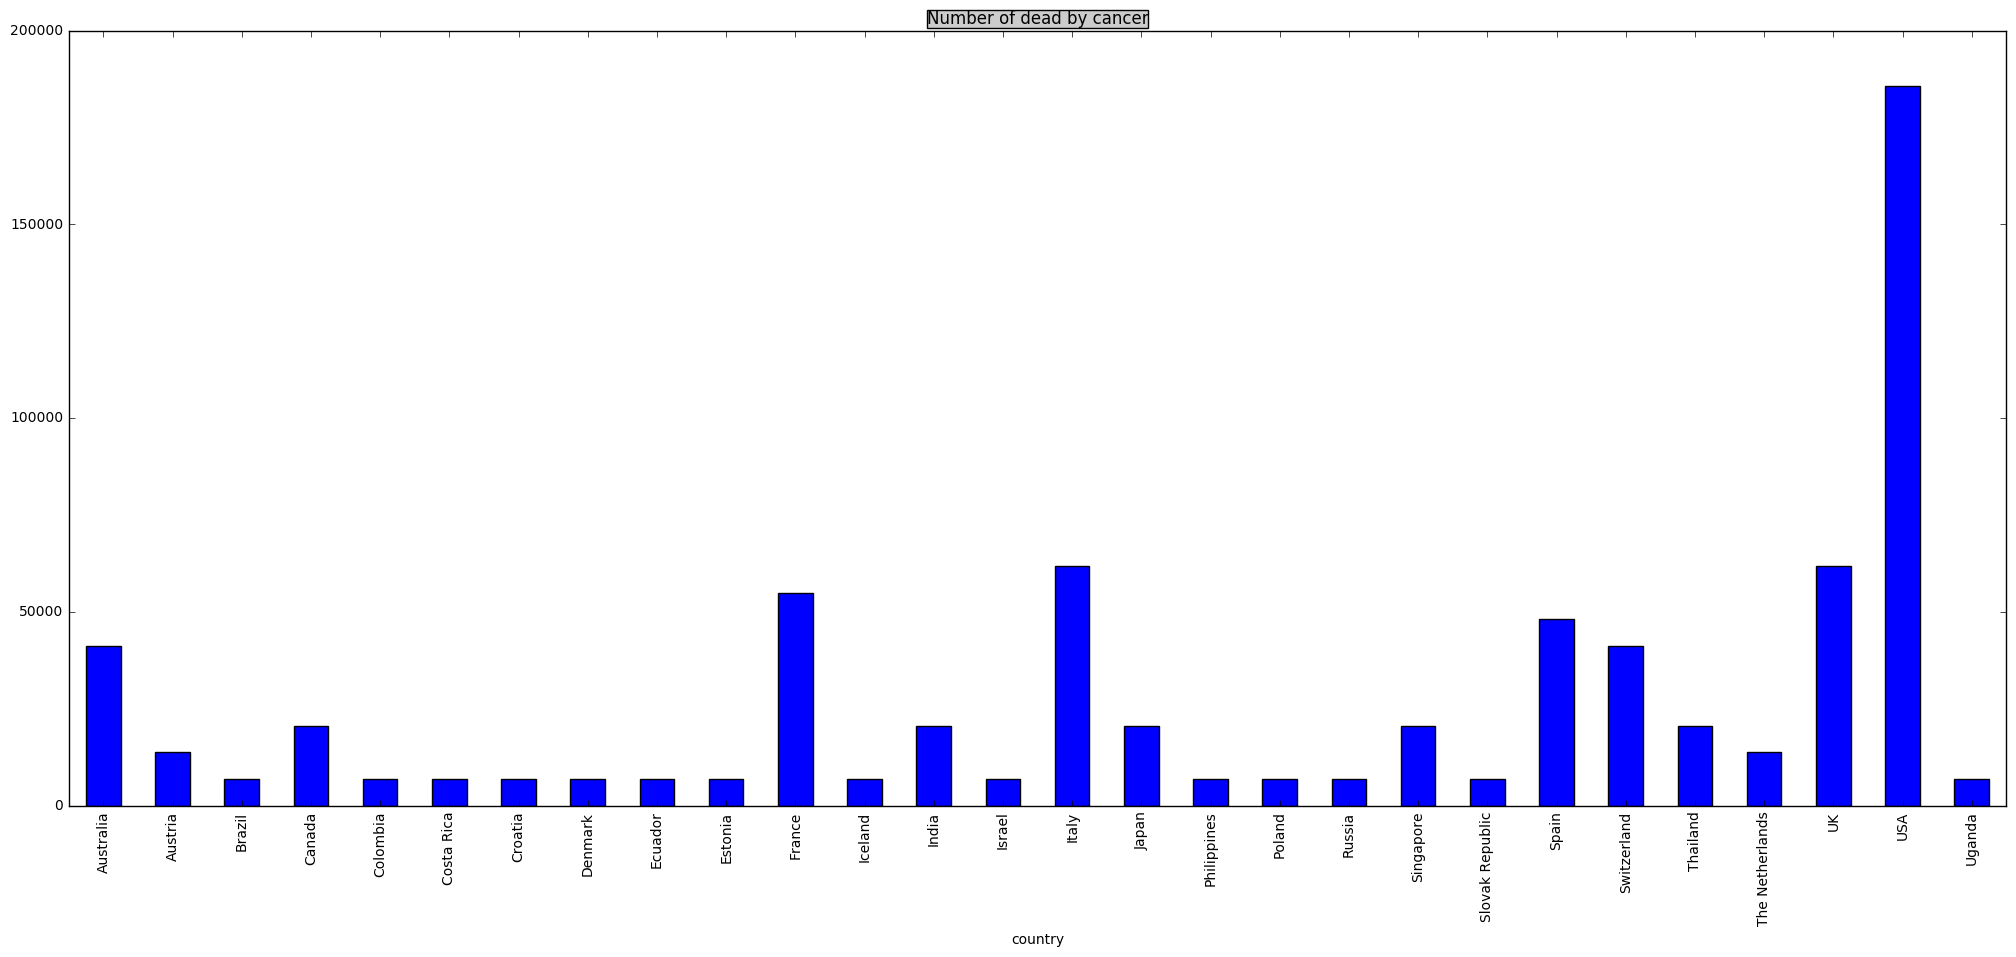

In [20]:
incidence_2002_by_country.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of deads by cancer', bbox={'facecolor':'0.8', 'pad':0})

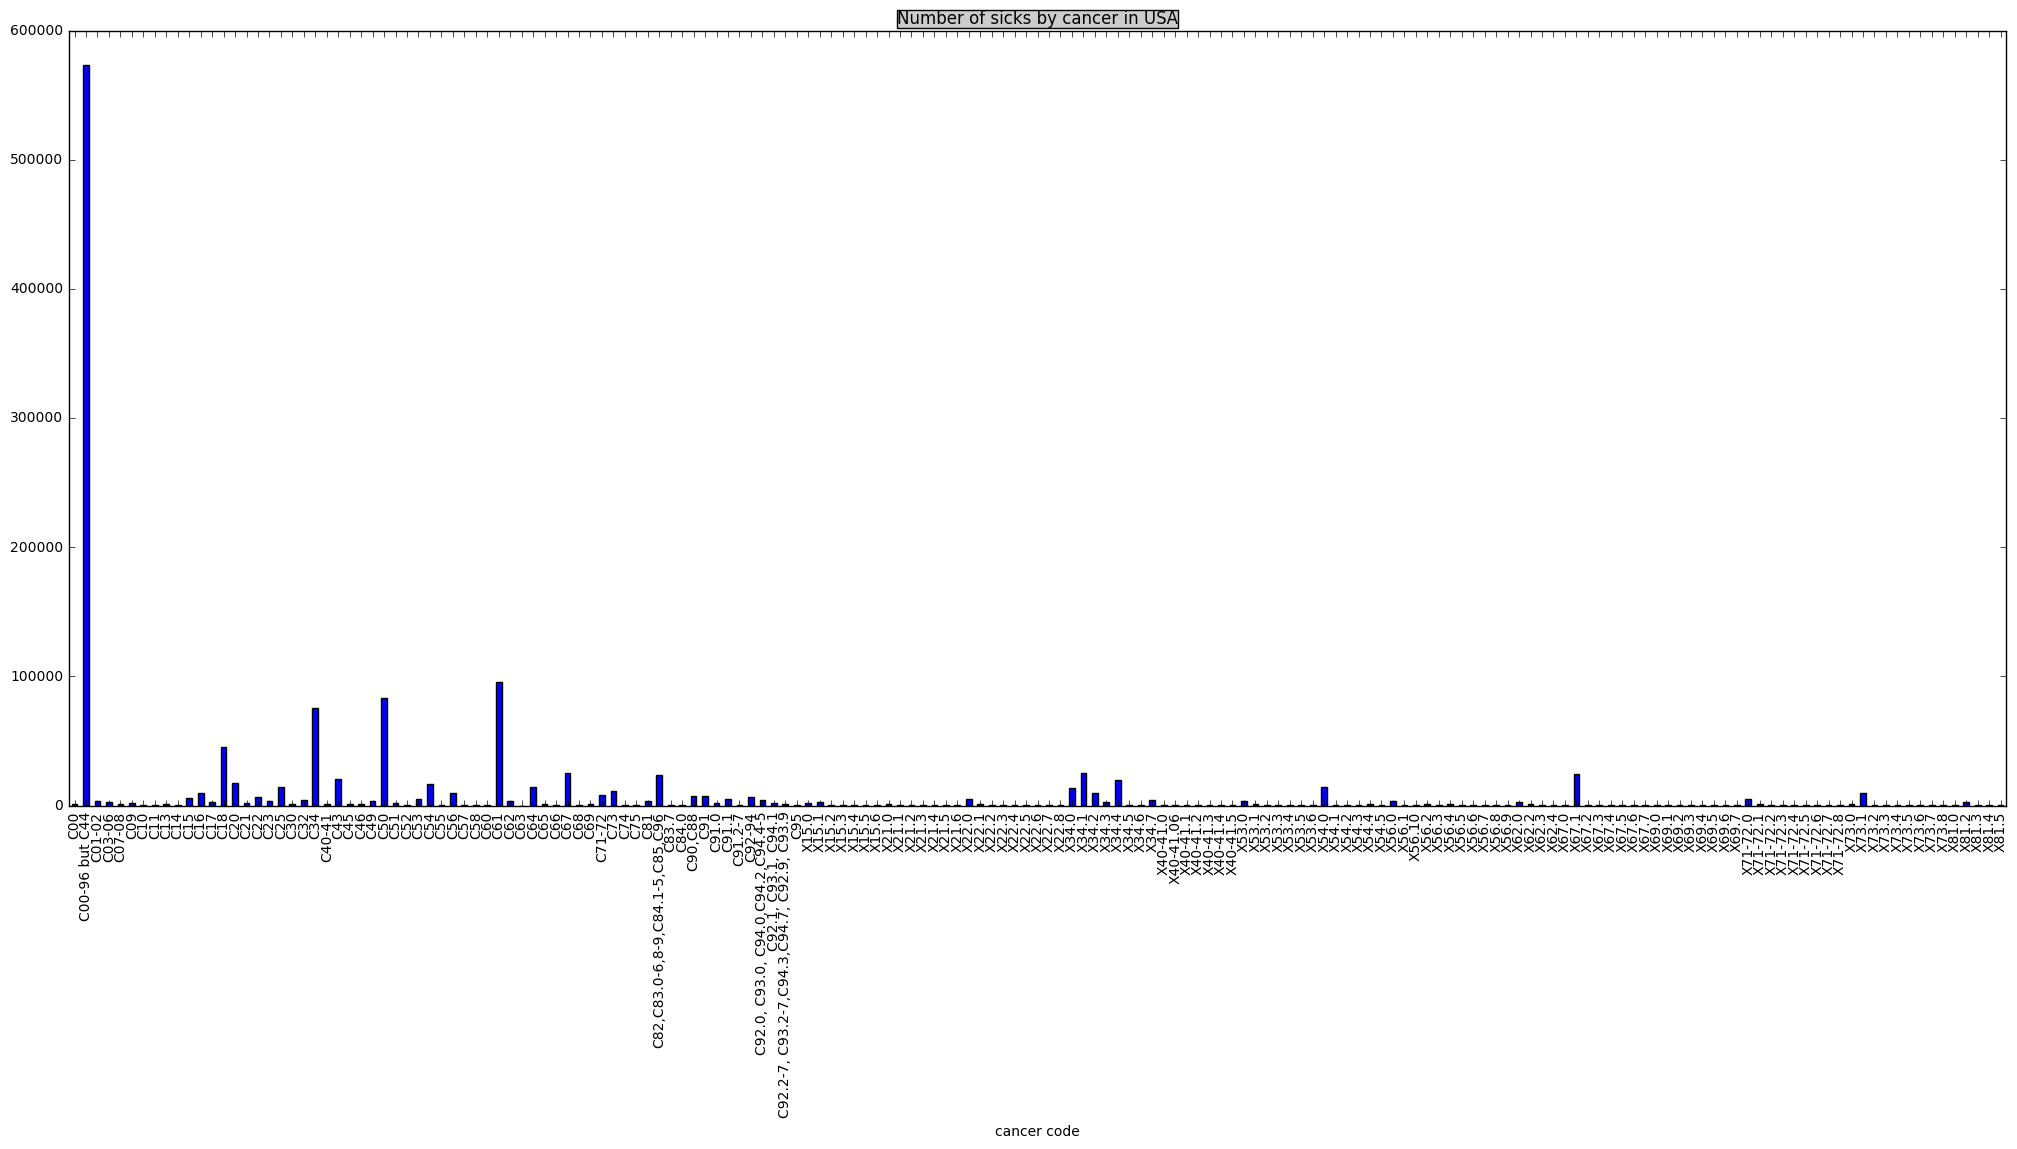

In [24]:
#Prenons l'exemple des USA, quels sont les cancers detectés ? et quelle est l'incidence de ces cancers?
incidence_USA_2002 = incidence_2002[incidence_2002['country'] == 'USA']
#incidence_USA_2002 = pd.DataFrame({'cancer_code':Taux_incidence_by_cancer.index, 'count':Taux_incidence_by_cancer.values})
incidence_USA_2002_by_cancer=incidence_USA_2002.groupby(['cancer code'])['incidence'].sum()
incidence_USA_2002_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of sicks by cancer in USA', bbox={'facecolor':'0.8', 'pad':0})

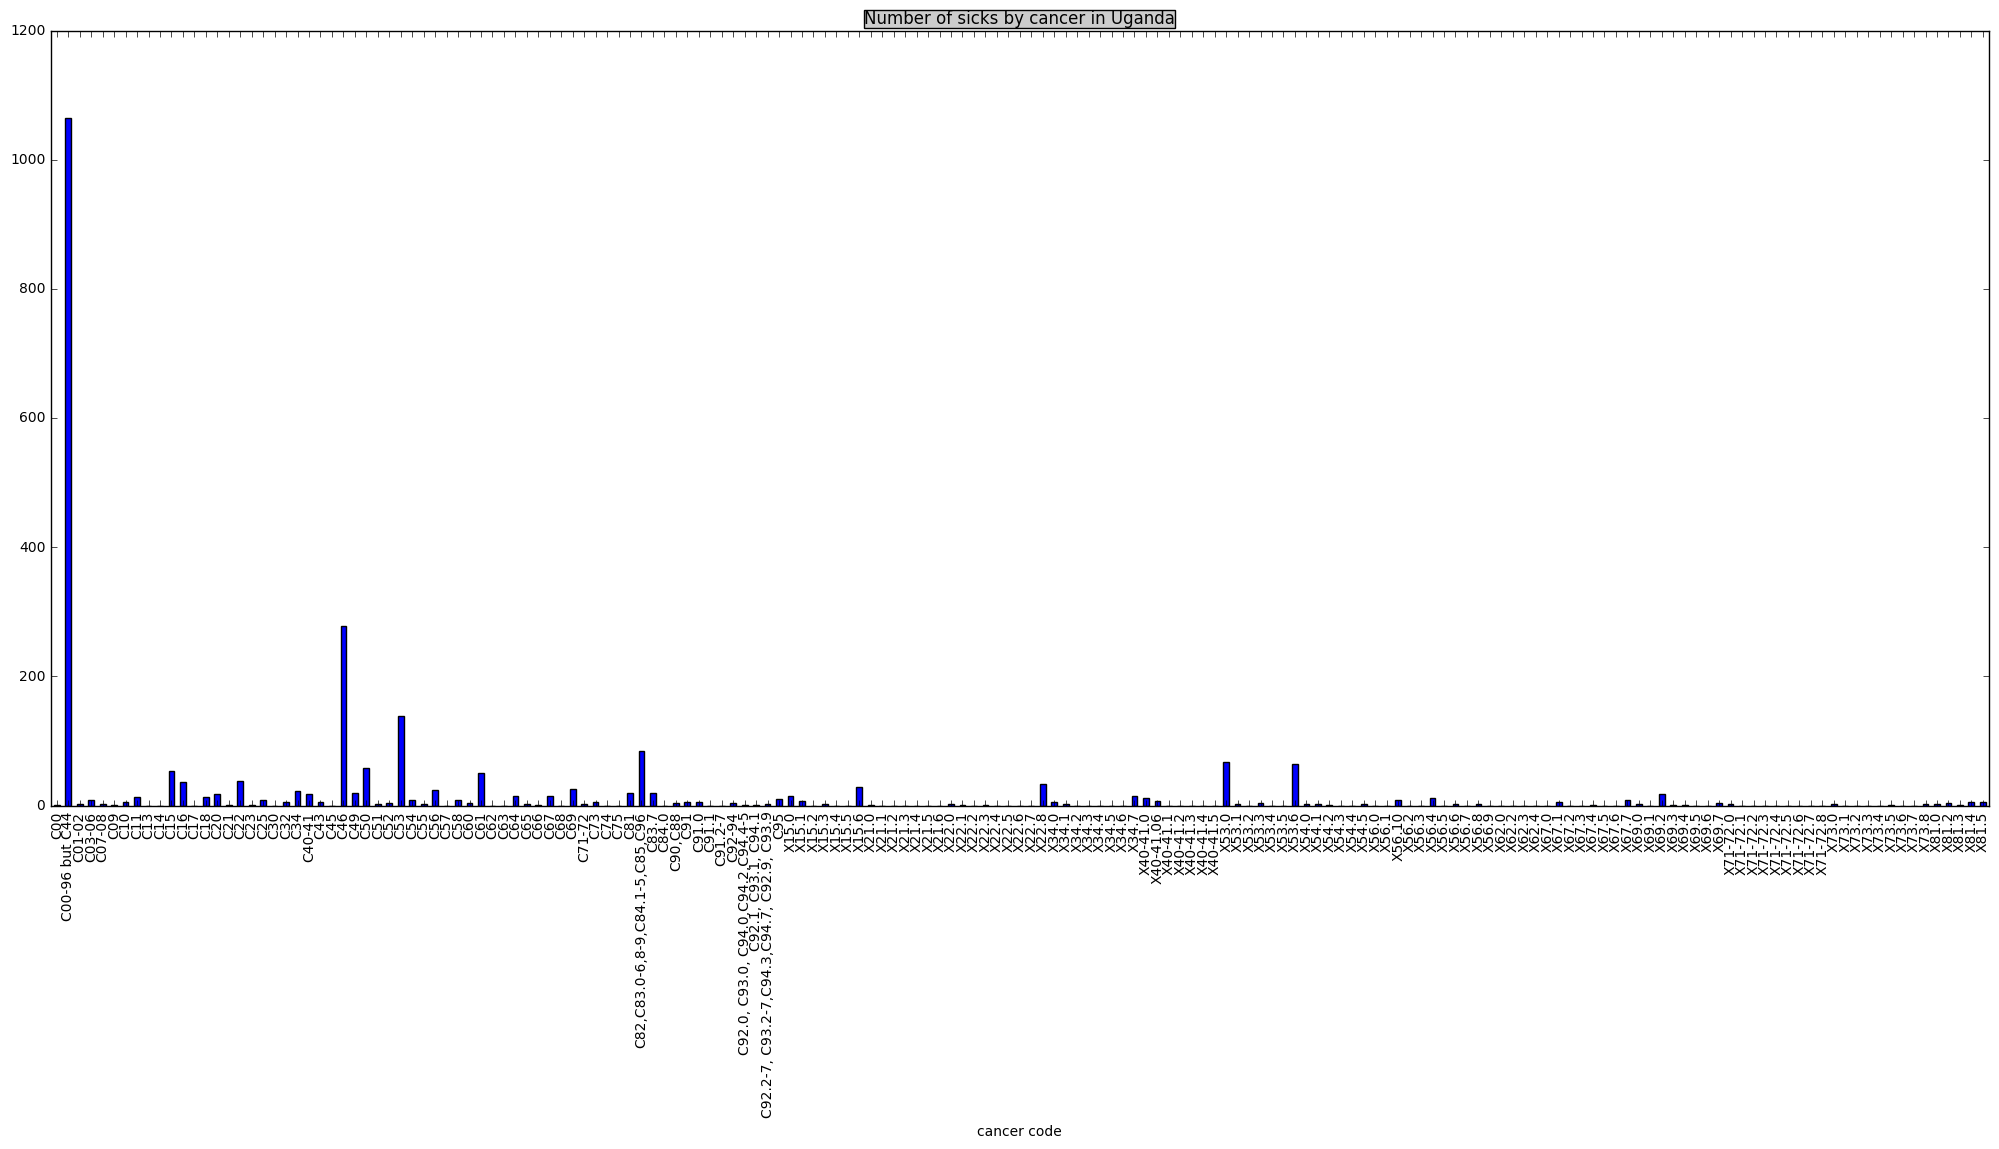

In [26]:
#Prenons l'exemple des USA, quels sont les cancers detectés ? et quelle est l'incidence de chaque cancer?
incidence_Uganda_2002 = incidence_2002[incidence_2002['country'] == 'Uganda']
#incidence_USA_2002 = pd.DataFrame({'cancer_code':Taux_incidence_by_cancer.index, 'count':Taux_incidence_by_cancer.values})
incidence_Uganda_2002_by_cancer=incidence_Uganda_2002.groupby(['cancer code'])['incidence'].sum()
incidence_Uganda_2002_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of sicks by cancer in Uganda', bbox={'facecolor':'0.8', 'pad':0})